**Fase 1: Exploración y Limpieza**

1. Exploración Inicial:

- Realiza una exploración inicial de los datos para identificar posibles problemas, como valores nulos, atípicos o datos faltantes en las columnas relevantes.

- Utiliza funciones de Pandas para obtener información sobre la estructura de los datos, la presencia de valores nulos y estadísticas básicas de las columnas involucradas.
  
- Une los dos conjuntos de datos de la forma más eficiente.

In [965]:
# 1. Instalación de bibliotecas: 

import pandas as pd 
import numpy as np 
from IPython.display import display #He añadido esta para mostrar el dataframe en formato de tabla para que sea más legible

In [966]:
# 2. Exploración inicial de los datos de Customer Flight Activity

# Primero hago el proceso de exploración y análisis de la primera base de datos

def explorar_dataset(filepath, index_col=0, n=5):  #filepath: Ruta del archivo CSV a cargar.
     
    # Lectura del dataset
    
    df = pd.read_csv('Customer_Flight_Activity.csv', index_col=index_col)

    
    df.reset_index(inplace=True)  # Esto convierte el índice actual en una columna y asigna un nuevo índice, para poder manipular la información del índice con la tabla
    
    # Eliminación de la columna del índice 
    if isinstance(index_col, int):
        print(f"Usando la columna {index_col} como índice.")
    elif isinstance(index_col, str):
        print(f"Usando la columna '{index_col}' como índice.")
    

     # Desactiva la visualización del índice al imprimir
    pd.set_option('display.show_dimensions', False)
    
    # Tamaño y estructura del DataFrame
    print("\n--- Información general del DataFrame ---")
    df.info()  
    print("\nPrimeras filas del DataFrame:")
    display(df.head(n))  
    print("\nFilas aleatorias del DataFrame:")
    display(df.sample(n))  #Aunque head me muestra las primeras filas, he querido añadir esto para poder ver información aleatoria del dataframe y ver diferentes datos 
    print(f"\nTamaño del dataset: {df.size} elementos")
    print(f"Forma del dataset: {df.shape[0]} filas, {df.shape[1]} columnas")

    # Exploración de columnas
    print("\n--- Información sobre las columnas ---")
    pd.set_option('display.max_columns', None)  # Para poder todas las columnas
    print(f"Columnas del dataset: {df.columns.tolist()}")
    print("\nConteo de valores no nulos por columna:")
    print(df.count())  # Conteo de valores no nulos por columna

    # Devolución del DataFrame para posibles análisis adicionales
    return df




In [967]:
#Llamo a la función

filepath = 'Customer_Flight_Activity.csv'
dataset = explorar_dataset(filepath, index_col=0, n=5)

Usando la columna 0 como índice.

--- Información general del DataFrame ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 405624 entries, 0 to 405623
Data columns (total 10 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   Loyalty Number               405624 non-null  int64  
 1   Year                         405624 non-null  int64  
 2   Month                        405624 non-null  int64  
 3   Flights Booked               405624 non-null  int64  
 4   Flights with Companions      405624 non-null  int64  
 5   Total Flights                405624 non-null  int64  
 6   Distance                     405624 non-null  int64  
 7   Points Accumulated           405624 non-null  float64
 8   Points Redeemed              405624 non-null  int64  
 9   Dollar Cost Points Redeemed  405624 non-null  int64  
dtypes: float64(1), int64(9)
memory usage: 30.9 MB

Primeras filas del DataFrame:


,Loyalty Number,Year,Month,Flights Booked,Flights with Companions,Total Flights,Distance,Points Accumulated,Points Redeemed,Dollar Cost Points Redeemed
0,100018,2017,1,3,0,3,1521,152.0,0,0
1,100102,2017,1,10,4,14,2030,203.0,0,0
2,100140,2017,1,6,0,6,1200,120.0,0,0
3,100214,2017,1,0,0,0,0,0.0,0,0
4,100272,2017,1,0,0,0,0,0.0,0,0



Filas aleatorias del DataFrame:


,Loyalty Number,Year,Month,Flights Booked,Flights with Companions,Total Flights,Distance,Points Accumulated,Points Redeemed,Dollar Cost Points Redeemed
186862,151183,2017,12,0,0,0,0,0.0,0,0
35984,216072,2017,3,0,0,0,0,0.0,0,0
389170,123784,2018,12,0,0,0,0,0.0,0,0
146358,693138,2017,9,14,6,20,3320,332.0,0,0
93946,603433,2017,6,0,0,0,0,0.0,0,0



Tamaño del dataset: 4056240 elementos
Forma del dataset: 405624 filas, 10 columnas

--- Información sobre las columnas ---
Columnas del dataset: ['Loyalty Number', 'Year', 'Month', 'Flights Booked', 'Flights with Companions', 'Total Flights', 'Distance', 'Points Accumulated', 'Points Redeemed', 'Dollar Cost Points Redeemed']

Conteo de valores no nulos por columna:
Loyalty Number                 405624
Year                           405624
Month                          405624
Flights Booked                 405624
Flights with Companions        405624
Total Flights                  405624
Distance                       405624
Points Accumulated             405624
Points Redeemed                405624
Dollar Cost Points Redeemed    405624
dtype: int64


In [969]:
# Estandarizo los nombres de las columnas del DataFrame con una sola función:

def estandarizar_columnas(dataset):
    
    dataset.columns = dataset.columns.str.strip().str.lower().str.replace(" ", "_").str.replace(r'[^\w\s]', '', regex=True)
    print(f"Nombres de columnas estandarizados: {dataset.columns.tolist()}")
    return dataset

estandarizar_columnas(dataset) #Llamo a la función

Nombres de columnas estandarizados: ['loyalty_number', 'year', 'month', 'flights_booked', 'flights_with_companions', 'total_flights', 'distance', 'points_accumulated', 'points_redeemed', 'dollar_cost_points_redeemed']


,loyalty_number,year,month,flights_booked,flights_with_companions,total_flights,distance,points_accumulated,points_redeemed,dollar_cost_points_redeemed
0,100018,2017,1,3,0,3,1521,152.0,0,0
1,100102,2017,1,10,4,14,2030,203.0,0,0
2,100140,2017,1,6,0,6,1200,120.0,0,0
3,100214,2017,1,0,0,0,0,0.0,0,0
4,100272,2017,1,0,0,0,0,0.0,0,0
...,...,...,...,...,...,...,...,...,...,...
405619,999902,2018,12,0,0,0,0,0.0,0,0
405620,999911,2018,12,0,0,0,0,0.0,0,0
405621,999940,2018,12,3,0,3,1233,123.0,0,0
405622,999982,2018,12,0,0,0,0,0.0,0,0


In [970]:
# Calculo y muestro la cantidad de valores únicos por columna.

def valores_unicos_por_columna(dataset):
    
    print("\n--- Valores únicos por columna ---")
    valores_unicos = {col: len(dataset[col].unique()) for col in dataset.columns}
    valores_unicos_df = pd.DataFrame(
        list(valores_unicos.items()),
        columns=['Columna', 'Valores únicos']
    )
    display(valores_unicos_df)
    return valores_unicos_df


valores_unicos = valores_unicos_por_columna(dataset) #Llamo a la función


--- Valores únicos por columna ---


,Columna,Valores únicos
0,loyalty_number,16737
1,year,2
2,month,12
3,flights_booked,22
4,flights_with_companions,12
5,total_flights,33
6,distance,4746
7,points_accumulated,1549
8,points_redeemed,587
9,dollar_cost_points_redeemed,49


In [971]:
# Esta función procesa las columnas numéricas (que en este caso son todas) y muestra estadísticas del DataFrame.

def procesar_columnas_numericas(dataset, columnas_numericas=None): 
    
    # Si no se especifican columnas, se detectan automáticamente
    if columnas_numericas is None:
        columnas_numericas = dataset.select_dtypes(include='number').columns.tolist()
        print(f"\nColumnas numéricas detectadas automáticamente: {columnas_numericas}")
    
    # Creo un diccionario para almacenar las estadísticas de cada columna
    estadisticas = {}
    
    # Proceso solo las columnas especificadas
    for columna in columnas_numericas:
        if columna in dataset.columns:
            # Calculo estadísticas para la columna
            stats = dataset[columna].describe()
            estadisticas[columna] = stats
            
            # Filtro valores negativos
            if (dataset[columna] < 0).any():
                print(f"\nSe encontraron valores negativos en '{columna}', filtrando...")
                dataset = df[df[columna] >= 0]
        else:
            print(f"\nLa columna '{columna}' no existe en el DataFrame.")
    
    # Convierto el diccionario de estadísticas en un DataFrame
    df_estadisticas = pd.DataFrame(estadisticas)
    print("\nEstadísticas descriptivas:")
    print(df_estadisticas.T)  # Transposición para que las columnas sean filas
    
    return df



In [972]:
# Llamo a la función
df_procesado = procesar_columnas_numericas(dataset, columnas_numericas=None)


Columnas numéricas detectadas automáticamente: ['loyalty_number', 'year', 'month', 'flights_booked', 'flights_with_companions', 'total_flights', 'distance', 'points_accumulated', 'points_redeemed', 'dollar_cost_points_redeemed']

Estadísticas descriptivas:
                                count           mean            std       min  \
loyalty_number               405624.0  550037.873084  258935.286969  100018.0   
year                         405624.0    2017.500000       0.500001    2017.0   
month                        405624.0       6.500000       3.452057       1.0   
flights_booked               405624.0       4.115052       5.225518       0.0   
flights_with_companions      405624.0       1.031805       2.076869       0.0   
total_flights                405624.0       5.146858       6.521227       0.0   
distance                     405624.0    1208.880059    1433.155320       0.0   
points_accumulated           405624.0     123.692721     146.599831       0.0   
points_redeem

In [973]:
#Después de analizar todas las columnas numéricas, procedo a realizar estadísticas de las que son más relevantes

def estadisticas_numericas(dataset, columnas=None):
 
    # Selecciona columnas numéricas especificadas o todas si no se indican
    if columnas is not None:
        columnas_existentes = [col for col in columnas if col in dataset.columns]
        if not columnas_existentes:
            raise ValueError("Ninguna de las columnas especificadas existe en el DataFrame.")
        dataset = dataset[columnas_existentes]
        print(f"Analizando las siguientes columnas numéricas: {columnas_existentes}")
    else:
        print("Analizando todas las columnas numéricas del DataFrame.")

    # Calcula estadísticas descriptivas
    estadisticas = dataset.select_dtypes(include='number').describe()
    estadisticas_transpuestas = estadisticas.T

    print("\n--- Estadísticas descriptivas de variables numéricas ---")
    display(estadisticas)

    print("\n--- Estadísticas descriptivas transpuestas (numéricas) ---")
    display(estadisticas_transpuestas)

    return {
        'estadisticas': estadisticas,
        'estadisticas_transpuestas': estadisticas_transpuestas
    }



In [974]:
# Creo una variable para meter las columnas que quiero procesar
columnas_a_procesar = ['flights_booked', 
    'flights_with_companions', 
    'total_flights', 
    'distance', 
    'points_accumulated', 
    'points_redeemed', 
    'dollar_cost_points_redeemed']

estadisticas_num = estadisticas_numericas(dataset, columnas=columnas_a_procesar)

Analizando las siguientes columnas numéricas: ['flights_booked', 'flights_with_companions', 'total_flights', 'distance', 'points_accumulated', 'points_redeemed', 'dollar_cost_points_redeemed']

--- Estadísticas descriptivas de variables numéricas ---


,flights_booked,flights_with_companions,total_flights,distance,points_accumulated,points_redeemed,dollar_cost_points_redeemed
count,405624.000000,405624.000000,405624.000000,405624.000000,405624.000000,405624.000000,405624.000000
mean,4.115052,1.031805,5.146858,1208.880059,123.692721,30.696872,2.484503
std,5.225518,2.076869,6.521227,1433.155320,146.599831,125.486049,10.150038
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.000000,1.000000,488.000000,50.000000,0.000000,0.000000
75%,8.000000,1.000000,10.000000,2336.000000,239.000000,0.000000,0.000000
max,21.000000,11.000000,32.000000,6293.000000,676.500000,876.000000,71.000000



--- Estadísticas descriptivas transpuestas (numéricas) ---


,count,mean,std,min,25%,50%,75%,max
flights_booked,405624.0,4.115052,5.225518,0.0,0.0,1.0,8.0,21.0
flights_with_companions,405624.0,1.031805,2.076869,0.0,0.0,0.0,1.0,11.0
total_flights,405624.0,5.146858,6.521227,0.0,0.0,1.0,10.0,32.0
distance,405624.0,1208.880059,1433.155320,0.0,0.0,488.0,2336.0,6293.0
points_accumulated,405624.0,123.692721,146.599831,0.0,0.0,50.0,239.0,676.5
points_redeemed,405624.0,30.696872,125.486049,0.0,0.0,0.0,0.0,876.0
dollar_cost_points_redeemed,405624.0,2.484503,10.150038,0.0,0.0,0.0,0.0,71.0


In [975]:
# 3. Exploración inicial de los datos de Customer Loyalty History usando la misma función que en la anterior base de datos

def explorar_dataset(filepath, index_col=0, n=5):
    
    # Lectura del dataset
    df_2 = pd.read_csv('Customer_Loyalty_History.csv', index_col=index_col)

    # Restablece el índice para convertirlo en una columna normal
    df_2.reset_index(inplace=True)  # Esto convierte el índice actual en una columna y asigna un nuevo índice
        
    # Elimina la columna del índice (si es necesario)
    if isinstance(index_col, int):
        print(f"Usando la columna {index_col} como índice.")
    elif isinstance(index_col, str):
        print(f"Usando la columna '{index_col}' como índice.")

     # Desactiva la visualización del índice al imprimir
    pd.set_option('display.show_dimensions', False)
    
    # Tamaño y estructura del DataFrame
    print("\n--- Información general del DataFrame ---")
    df_2.info()  
    print("\nPrimeras filas del DataFrame:")
    display(df_2.head(n))  
    print("\nFilas aleatorias del DataFrame:")
    display(df_2.sample(n))  
    print(f"\nTamaño del dataset: {df_2.size} elementos")
    print(f"Forma del dataset: {df_2.shape[0]} filas, {df_2.shape[1]} columnas")

    # Exploración de columnas
    print("\n--- Información sobre las columnas ---")
    pd.set_option('display.max_columns', None)  # Ver todas las columnas
    print(f"Columnas del dataset: {df_2.columns.tolist()}")
    print("\nConteo de valores no nulos por columna:")
    print(df_2.count())  # Conteo de valores no nulos por columna

    # Retorna el DataFrame para posibles análisis adicionales
    return df_2


In [976]:
# Uso de la función
filepath_2 = 'Customer_Loyalty_History.csv'
dataset_2 = explorar_dataset(filepath_2, index_col=0, n=5)

Usando la columna 0 como índice.

--- Información general del DataFrame ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16737 entries, 0 to 16736
Data columns (total 16 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Loyalty Number      16737 non-null  int64  
 1   Country             16737 non-null  object 
 2   Province            16737 non-null  object 
 3   City                16737 non-null  object 
 4   Postal Code         16737 non-null  object 
 5   Gender              16737 non-null  object 
 6   Education           16737 non-null  object 
 7   Salary              12499 non-null  float64
 8   Marital Status      16737 non-null  object 
 9   Loyalty Card        16737 non-null  object 
 10  CLV                 16737 non-null  float64
 11  Enrollment Type     16737 non-null  object 
 12  Enrollment Year     16737 non-null  int64  
 13  Enrollment Month    16737 non-null  int64  
 14  Cancellation Year   2067 n

,Loyalty Number,Country,Province,City,Postal Code,Gender,Education,Salary,Marital Status,Loyalty Card,CLV,Enrollment Type,Enrollment Year,Enrollment Month,Cancellation Year,Cancellation Month
0,480934,Canada,Ontario,Toronto,M2Z 4K1,Female,Bachelor,83236.0,Married,Star,3839.14,Standard,2016,2,NaN,NaN
1,549612,Canada,Alberta,Edmonton,T3G 6Y6,Male,College,NaN,Divorced,Star,3839.61,Standard,2016,3,NaN,NaN
2,429460,Canada,British Columbia,Vancouver,V6E 3D9,Male,College,NaN,Single,Star,3839.75,Standard,2014,7,2018.0,1.0
3,608370,Canada,Ontario,Toronto,P1W 1K4,Male,College,NaN,Single,Star,3839.75,Standard,2013,2,NaN,NaN
4,530508,Canada,Quebec,Hull,J8Y 3Z5,Male,Bachelor,103495.0,Married,Star,3842.79,Standard,2014,10,NaN,NaN



Filas aleatorias del DataFrame:


,Loyalty Number,Country,Province,City,Postal Code,Gender,Education,Salary,Marital Status,Loyalty Card,CLV,Enrollment Type,Enrollment Year,Enrollment Month,Cancellation Year,Cancellation Month
11538,839328,Canada,Nova Scotia,Halifax,B3J 9S2,Male,Bachelor,56384.0,Married,Star,2674.23,Standard,2012,7,NaN,NaN
2238,982542,Canada,Quebec,Tremblant,H5Y 2S9,Male,Bachelor,71908.0,Married,Aurora,7693.12,Standard,2013,6,2017.0,8.0
6347,834550,Canada,British Columbia,Vancouver,V6E 3D9,Male,College,NaN,Married,Nova,5060.30,Standard,2016,6,NaN,NaN
14644,379752,Canada,Quebec,Montreal,H2T 9K8,Female,Bachelor,83099.0,Divorced,Star,7553.23,Standard,2015,6,NaN,NaN
305,203550,Canada,Quebec,Tremblant,H5Y 2S9,Male,Bachelor,53610.0,Married,Star,4426.10,Standard,2013,11,NaN,NaN



Tamaño del dataset: 267792 elementos
Forma del dataset: 16737 filas, 16 columnas

--- Información sobre las columnas ---
Columnas del dataset: ['Loyalty Number', 'Country', 'Province', 'City', 'Postal Code', 'Gender', 'Education', 'Salary', 'Marital Status', 'Loyalty Card', 'CLV', 'Enrollment Type', 'Enrollment Year', 'Enrollment Month', 'Cancellation Year', 'Cancellation Month']

Conteo de valores no nulos por columna:
Loyalty Number        16737
Country               16737
Province              16737
City                  16737
Postal Code           16737
Gender                16737
Education             16737
Salary                12499
Marital Status        16737
Loyalty Card          16737
CLV                   16737
Enrollment Type       16737
Enrollment Year       16737
Enrollment Month      16737
Cancellation Year      2067
Cancellation Month     2067
dtype: int64


In [977]:
# Estandarizo los nombres de las columnas del DataFrame con una sola función:

def estandarizar_columnas(dataset_2):
    
    dataset_2.columns = dataset_2.columns.str.strip().str.lower().str.replace(" ", "_").str.replace(r'[^\w\s]', '', regex=True)
    print(f"Nombres de columnas estandarizados: {dataset_2.columns.tolist()}")
    return dataset_2


estandarizar_columnas(dataset_2) #Llamo a la función

Nombres de columnas estandarizados: ['loyalty_number', 'country', 'province', 'city', 'postal_code', 'gender', 'education', 'salary', 'marital_status', 'loyalty_card', 'clv', 'enrollment_type', 'enrollment_year', 'enrollment_month', 'cancellation_year', 'cancellation_month']


,loyalty_number,country,province,city,postal_code,gender,education,salary,marital_status,loyalty_card,clv,enrollment_type,enrollment_year,enrollment_month,cancellation_year,cancellation_month
0,480934,Canada,Ontario,Toronto,M2Z 4K1,Female,Bachelor,83236.0,Married,Star,3839.14,Standard,2016,2,NaN,NaN
1,549612,Canada,Alberta,Edmonton,T3G 6Y6,Male,College,NaN,Divorced,Star,3839.61,Standard,2016,3,NaN,NaN
2,429460,Canada,British Columbia,Vancouver,V6E 3D9,Male,College,NaN,Single,Star,3839.75,Standard,2014,7,2018.0,1.0
3,608370,Canada,Ontario,Toronto,P1W 1K4,Male,College,NaN,Single,Star,3839.75,Standard,2013,2,NaN,NaN
4,530508,Canada,Quebec,Hull,J8Y 3Z5,Male,Bachelor,103495.0,Married,Star,3842.79,Standard,2014,10,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16732,823768,Canada,British Columbia,Vancouver,V6E 3Z3,Female,College,NaN,Married,Star,61850.19,Standard,2012,12,NaN,NaN
16733,680886,Canada,Saskatchewan,Regina,S1J 3C5,Female,Bachelor,89210.0,Married,Star,67907.27,Standard,2014,9,NaN,NaN
16734,776187,Canada,British Columbia,Vancouver,V5R 1W3,Male,College,NaN,Single,Star,74228.52,Standard,2014,3,NaN,NaN
16735,906428,Canada,Yukon,Whitehorse,Y2K 6R0,Male,Bachelor,-57297.0,Married,Star,10018.66,2018 Promotion,2018,4,NaN,NaN


In [978]:
# Calculo y muestro la cantidad de valores únicos por columna.

def valores_unicos_por_columna(dataset_2):
    
    print("\n--- Valores únicos por columna ---")
    valores_unicos = {col: len(dataset_2[col].unique()) for col in dataset_2.columns}
    valores_unicos_df_2 = pd.DataFrame(
        list(valores_unicos.items()),
        columns=['Columna', 'Valores únicos']
    )
    display(valores_unicos_df_2)
    return valores_unicos_df_2


valores_unicos = valores_unicos_por_columna(dataset_2) #Llamo a la función


--- Valores únicos por columna ---


,Columna,Valores únicos
0,loyalty_number,16737
1,country,1
2,province,11
3,city,29
4,postal_code,55
5,gender,2
6,education,5
7,salary,5891
8,marital_status,3
9,loyalty_card,3


In [979]:
# Esta función procesa las columnas numéricas y muestra estadísticas del DataFrame con describe().


def procesar_columnas_numericas(dataset_2, columnas_numericas=None):
    
    # Si no se especifican columnas, las detecta automáticamente
    if columnas_numericas is None:
        columnas_numericas = dataset_2.select_dtypes(include='number').columns.tolist()
        print(f"\nColumnas numéricas detectadas automáticamente: {columnas_numericas}")
    
    # Esto procesa solo las columnas especificadas
    for columna in columnas_numericas:
        if columna in dataset_2.columns:
            print(f"\nEstadísticas de la columna '{columna}':")
            print(dataset_2[columna].describe())
            
            # Filtro valores negativos
            if (dataset_2[columna] < 0).any():
                print(f"\nSe encontraron valores negativos en '{columna}', filtrando...")
                df = dataset_2[dataset_2[columna] >= 0]
        else:
            print(f"\nLa columna '{columna}' no existe en el DataFrame.")
    
    return dataset_2


In [980]:

# Llamo a la función con las columnas deseadas
df_procesado2 = procesar_columnas_numericas(dataset_2, columnas_numericas=None)


Columnas numéricas detectadas automáticamente: ['loyalty_number', 'salary', 'clv', 'enrollment_year', 'enrollment_month', 'cancellation_year', 'cancellation_month']

Estadísticas de la columna 'loyalty_number':
count     16737.000000
mean     549735.880445
std      258912.132453
min      100018.000000
25%      326603.000000
50%      550434.000000
75%      772019.000000
max      999986.000000
Name: loyalty_number, dtype: float64

Estadísticas de la columna 'salary':
count     12499.000000
mean      79245.609409
std       35008.297285
min      -58486.000000
25%       59246.500000
50%       73455.000000
75%       88517.500000
max      407228.000000
Name: salary, dtype: float64

Se encontraron valores negativos en 'salary', filtrando...

Estadísticas de la columna 'clv':
count    16737.000000
mean      7988.896536
std       6860.982280
min       1898.010000
25%       3980.840000
50%       5780.180000
75%       8940.580000
max      83325.380000
Name: clv, dtype: float64

Estadísticas de la

In [981]:
# Después de ver todos los datos, uso esta función para realizar estadísticas numéricas de columnas específicas, para ver en este caso salary y clv, que considero más relevantes:

def estadisticas_numericas(dataset_2, columnas=None):
 
    # Selección columnas numéricas especificadas o todas si no se indican
    if columnas is not None:
        columnas_existentes = [col for col in columnas if col in dataset_2.columns]
        if not columnas_existentes:
            raise ValueError("Ninguna de las columnas especificadas existe en el DataFrame.")
        dataset_2 = dataset_2[columnas_existentes]
        print(f"Analizando las siguientes columnas numéricas: {columnas_existentes}")
    else:
        print("Analizando todas las columnas numéricas del DataFrame.")

    # Calculo estadísticas descriptivas
    estadisticas = dataset_2.select_dtypes(include='number').describe()
    estadisticas_transpuestas = estadisticas.T

    print("\n--- Estadísticas descriptivas de variables numéricas ---")
    display(estadisticas)

    print("\n--- Estadísticas descriptivas transpuestas (numéricas) ---")
    display(estadisticas_transpuestas)

    return {
        'estadisticas': estadisticas,
        'estadisticas_transpuestas': estadisticas_transpuestas
    }



In [982]:
#Llamada de la función con las columnas que quiero analizar
estadisticas_num = estadisticas_numericas(dataset_2, columnas=['salary', 'clv'])

Analizando las siguientes columnas numéricas: ['salary', 'clv']

--- Estadísticas descriptivas de variables numéricas ---


,salary,clv
count,12499.000000,16737.000000
mean,79245.609409,7988.896536
std,35008.297285,6860.982280
min,-58486.000000,1898.010000
25%,59246.500000,3980.840000
50%,73455.000000,5780.180000
75%,88517.500000,8940.580000
max,407228.000000,83325.380000



--- Estadísticas descriptivas transpuestas (numéricas) ---


,count,mean,std,min,25%,50%,75%,max
salary,12499.0,79245.609409,35008.297285,-58486.00,59246.50,73455.00,88517.50,407228.00
clv,16737.0,7988.896536,6860.982280,1898.01,3980.84,5780.18,8940.58,83325.38


In [983]:
#Como en la exploraicón del dataset me muestra columnas categóricas, hago un cálculo y muestra de la frecuencia de valores únicos en esas columnas.

def frecuencias_categoricas(dataset_2):
    
    print("\n--- Frecuencia de valores únicos en columnas categóricas ---")
    frecuencias_categoricas = []
    for col in dataset_2.select_dtypes(include='object').columns:
        frecuencias = dataset_2[col].value_counts().reset_index()
        frecuencias.columns = ['Valor', 'Frecuencia']
        frecuencias['Columna'] = col
        frecuencias_categoricas.append(frecuencias)

    if frecuencias_categoricas:
        frecuencias_categoricas_df = pd.concat(frecuencias_categoricas, ignore_index=True)
        display(frecuencias_categoricas_df)
        return frecuencias_categoricas_df
    else:
        print("No se encontraron columnas categóricas.")
        return None
    


In [984]:
frecuencias = frecuencias_categoricas(dataset_2) #Llamada de la función


--- Frecuencia de valores únicos en columnas categóricas ---


,Valor,Frecuencia,Columna
0,Canada,16737,country
1,Ontario,5404,province
2,British Columbia,4409,province
3,Quebec,3300,province
4,Alberta,969,province
...,...,...,...
106,Star,7637,loyalty_card
107,Nova,5671,loyalty_card
108,Aurora,3429,loyalty_card
109,Standard,15766,enrollment_type


In [985]:
#Esta función realiza un conteo a través de "describe" de los valores de cada columna categórica

def estadisticas_descriptivas(dataset_2):
   
    print("\n--- Estadísticas descriptivas de variables categóricas ---")
    estadisticas_categoricas = dataset_2.describe(include=[object])
    display(estadisticas_categoricas)

    return {'estadisticas_categoricas': estadisticas_categoricas }


estadisticas = estadisticas_descriptivas(dataset_2) #Llamada de la función



--- Estadísticas descriptivas de variables categóricas ---


,country,province,city,postal_code,gender,education,marital_status,loyalty_card,enrollment_type
count,16737,16737,16737,16737,16737,16737,16737,16737,16737
unique,1,11,29,55,2,5,3,3,2
top,Canada,Ontario,Toronto,V6E 3D9,Female,Bachelor,Married,Star,Standard
freq,16737,5404,3351,911,8410,10475,9735,7637,15766


In [986]:
# 3. Unión conjunto de datos: 

# Después de analizar las dos tablas, procedo a su unión con merge
# He decidido unir la segunda tabla con la primera, para ver primero la información del cliente y luego su historial.


df_unido = pd.merge(dataset_2, dataset, on='loyalty_number', how='inner')



In [987]:
df_unido.sample(5)


,loyalty_number,country,province,city,postal_code,gender,education,salary,marital_status,loyalty_card,clv,enrollment_type,enrollment_year,enrollment_month,cancellation_year,cancellation_month,year,month,flights_booked,flights_with_companions,total_flights,distance,points_accumulated,points_redeemed,dollar_cost_points_redeemed
315321,438263,Canada,Manitoba,Winnipeg,R2C 0M5,Male,College,NaN,Married,Star,4717.63,Standard,2014,5,NaN,NaN,2017,10,0,0,0,0,0.0,0,0
104940,174923,Canada,Quebec,Hull,J8Y 3Z5,Female,Bachelor,89076.0,Married,Nova,2799.47,Standard,2014,12,NaN,NaN,2017,12,5,0,5,2095,209.0,0,0
16229,201220,Canada,British Columbia,West Vancouver,V6V 8Z3,Male,Bachelor,63517.0,Married,Star,4892.62,Standard,2013,9,NaN,NaN,2017,5,3,1,4,2092,209.0,0,0
214972,443865,Canada,Ontario,Toronto,P2T 6G3,Male,Bachelor,58083.0,Married,Nova,11030.66,Standard,2012,9,NaN,NaN,2017,5,0,0,0,0,0.0,0,0
2311,566033,Canada,Ontario,Toronto,M2P 4F6,Male,College,NaN,Married,Star,4015.21,Standard,2015,6,2016.0,7.0,2017,8,0,0,0,0,0.0,0,0


**2. Limpieza de Datos:**
   
- Elimina o trata los valores nulos, si los hay, en las columnas clave para asegurar que los datos estén completos.
  
- Verifica la consistencia y corrección de los datos para asegurarte de que los datos se presenten de forma coherente.
  
- Realiza cualquier ajuste o conversión necesaria en las columnas (por ejemplo, cambiar tipos de datos) para garantizar la adecuación de los datos para el análisis estadístico.

In [988]:
# Esta función identifica los valores nulos en el DataFrame y devuelve un resumen en forma de DataFrame

def identificar_nulos(df_unido): #DataFrame a analizar
    
    # Calcular valores nulos y porcentaje de nulos
    resumen_nulos = df_unido.isnull().sum()
    porcentaje_nulos = df_unido.isnull().mean() * 100
    
    # Crear el DataFrame resumen
    resumen_df = pd.DataFrame({
        'Valores Nulos': resumen_nulos,
        'Porcentaje Nulos (%)': porcentaje_nulos
    }).reset_index()
    resumen_df.columns = ['Columna', 'Valores Nulos', 'Porcentaje Nulos (%)']
    
    # Filtrar columnas con valores nulos
    resumen_con_nulos = resumen_df[resumen_df['Valores Nulos'] > 0]
    
    # Mostrar el resumen directamente
    print("\n--- Resumen de columnas con valores nulos y porcentajes ---")
    display(resumen_con_nulos)

    return resumen_con_nulos 
    # Devuelve un DataFrame con el resumen y porcentaje de valores nulos por columna.




In [989]:
resumen_nulos_df = identificar_nulos(df_unido) #Llamada dde la función


--- Resumen de columnas con valores nulos y porcentajes ---


,Columna,Valores Nulos,Porcentaje Nulos (%)
7,salary,102672,25.312112
14,cancellation_year,355560,87.657535
15,cancellation_month,355560,87.657535


Como se puede ver, hay una diferencia bastante grande entre salario y año y mes de cancelación, por lo que lo voy tratar de dos maneras diferentes:

In [990]:
# En el caso de la columna de salario, he decidido procesarlo con la siguiente función que gestiona los valores nulos en columnas numéricas: 

import matplotlib.pyplot as plt

def gestionar_nulos_numericos(df_unido, columnas_numericas=['salary'], umbral_alto=30):
    
    #Parámetros:
    #columnas_numericas: Lista de columnas numéricas.
    #umbral_alto: Porcentaje considerado como "alto" para valores nulos.
        
    columnas_numericas = columnas_numericas or df_unido.select_dtypes(include='number').columns.tolist() #da dos opciones para la búsqueda de nulos

    for col in columnas_numericas:
        porcentaje_nulos = df_unido[col].isnull().mean() * 100
        print(f"\nProcesando columna numérica: {col} ({porcentaje_nulos:.2f}% de nulos)")

        if porcentaje_nulos > umbral_alto:
            print("- Eliminando la columna por alto porcentaje de nulos.")
            df_unido = df_unido.drop(columns=[col])
        else:
            print("- Analizando distribución para imputación.")  #muestro la gráfica para ver la distribución de valores
            df_unido[col].hist(bins=20, edgecolor='black', alpha=0.7)
            plt.title(f"Distribución de {col}")
            plt.xlabel("Valores")
            plt.ylabel("Frecuencia")
            plt.show()

            skewness = df_unido[col].skew()
            if abs(skewness) < 0.5:  # Distribución simétrica
                print("- Distribución simétrica. Imputando con la media.")
                df_unido[col] = df_unido[col].fillna(df_unido[col].mean())
            else:  # Distribución asimétrica
                print("- Distribución asimétrica. Imputando con la mediana.")
                df_unido[col] = df_unido[col].fillna(df_unido[col].median())

    return df_unido #Devuelve un DataFrame con los nulos gestionados en columnas numéricas.




Procesando columna numérica: salary (25.31% de nulos)
- Analizando distribución para imputación.


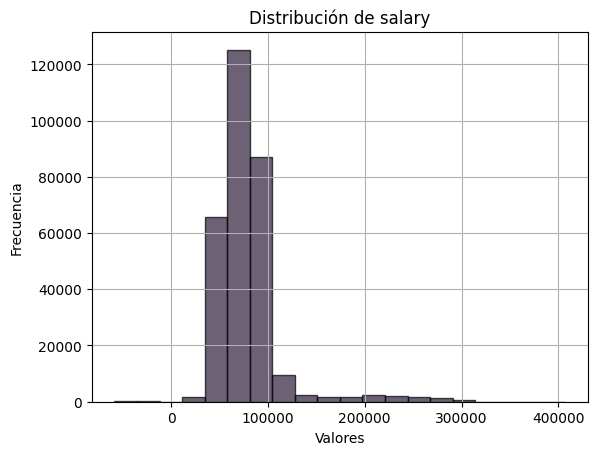

- Distribución asimétrica. Imputando con la mediana.


In [991]:
df_corregido = gestionar_nulos_numericos(df_unido, umbral_alto=30) #Llamada de la función de valores nulos en salario

In [992]:
df_unido.sample(5)

,loyalty_number,country,province,city,postal_code,gender,education,salary,marital_status,loyalty_card,clv,enrollment_type,enrollment_year,enrollment_month,cancellation_year,cancellation_month,year,month,flights_booked,flights_with_companions,total_flights,distance,points_accumulated,points_redeemed,dollar_cost_points_redeemed
269739,722089,Canada,Quebec,Montreal,H4G 3T4,Male,Bachelor,89932.0,Married,Star,2569.69,Standard,2017,6,NaN,NaN,2017,4,0,0,0,0,0.00,0,0
269201,586365,Canada,Quebec,Montreal,H2Y 2W2,Male,College,73479.0,Single,Star,2561.58,Standard,2018,1,NaN,NaN,2018,6,2,0,2,2828,282.00,0,0
288032,980761,Canada,Quebec,Quebec City,G1B 3L5,Female,Bachelor,83710.0,Married,Star,2776.77,Standard,2015,10,NaN,NaN,2017,8,0,0,0,0,0.00,0,0
131070,766530,Canada,Ontario,Toronto,M8Y 4K8,Female,College,73479.0,Single,Nova,3742.58,Standard,2016,3,NaN,NaN,2017,7,11,6,17,2516,251.00,0,0
254990,337842,Canada,Alberta,Edmonton,T9G 1W3,Female,College,73479.0,Married,Star,2441.39,Standard,2015,5,NaN,NaN,2018,2,6,0,6,1464,157.68,0,0


Como se ve en la tabla, month, enrollment month y cancellation month son "int" por lo que voy a convertirlos a "object". Y como en cancellation month y cancellation year el alto porcentaje de nulos es porque la cuenta sigue en activo, voy a cambiar los nulos por la palabra "Active".

In [993]:

def procesar_columnas(df_corregido, columnas_active=['cancellation_month', 'cancellation_year']): #Parámetros para las columnas que quiero cambiar los nulos por "Active"
    
    # Diccionario para mapear números a nombres de meses
    months = {
        1: 'January', 2: 'February', 3: 'March', 4: 'April',
        5: 'May', 6: 'June', 7: 'July', 8: 'August',
        9: 'September', 10: 'October', 11: 'November', 12: 'December'
    }

    # Operaciones para asegurarnos de que 'cancellation_year' y 'cancellation_month' solo contienen valores numéricos
    df_corregido['cancellation_year'] = pd.to_numeric(df_corregido['cancellation_year'], errors='coerce')
    df_corregido['cancellation_month'] = pd.to_numeric(df_corregido['cancellation_month'], errors='coerce')

    # Rellenamos los nulos con 0 en 'cancellation_year' y 'cancellation_month' y que son de tipo int
    df_corregido['cancellation_year'] = df_corregido['cancellation_year'].fillna(0).astype(int)
    df_corregido['cancellation_month'] = df_corregido['cancellation_month'].fillna(0).astype(int)

    # Reemplazar 0 en 'cancellation_year' y 'cancellation_month' por NaN (no cancelado)
    df_corregido["cancellation_year"] = df_corregido["cancellation_year"].replace(0, np.nan)
    df_corregido["cancellation_month"] = df_corregido["cancellation_month"].replace(0, np.nan) ###
    
    # Convertir 'month', 'enrollment_month' y 'cancellation_month' a nombres de meses
    df_corregido['month'] = df_corregido['month'].map(months)
    df_corregido['enrollment_month'] = df_corregido['enrollment_month'].map(months)
    df_corregido['cancellation_month'] = df_corregido['cancellation_month'].map(months)

    # Rellenar los valores nulos con 'Active' en las columnas especificadas
    df_corregido[columnas_active] = df_corregido[columnas_active].fillna('Active')

    return df_corregido



In [994]:
# Llamamos a la función e indicamos las columnas donde queremos reemplazar nulos con 'Active'
df_corregido = procesar_columnas(df_corregido, columnas_active=['cancellation_month', 'cancellation_year'])

In [995]:
# Elimino columna country ya que es el mismo en toda la tabla

df_corregido.drop('country', axis=1, inplace=True)

In [996]:
#Ejecuto una muestra para ver si se han realizado los cambios

df_corregido.sample(5)

,loyalty_number,province,city,postal_code,gender,education,salary,marital_status,loyalty_card,clv,enrollment_type,enrollment_year,enrollment_month,cancellation_year,cancellation_month,year,month,flights_booked,flights_with_companions,total_flights,distance,points_accumulated,points_redeemed,dollar_cost_points_redeemed
292864,578114,Quebec,Montreal,H2T 9K8,Male,College,73479.0,Single,Star,2987.95,Standard,2014,September,Active,Active,2018,May,0,0,0,0,0.0,0,0
370071,739767,Alberta,Edmonton,T9G 1W3,Female,Bachelor,92796.0,Divorced,Star,8733.53,Standard,2018,November,Active,Active,2018,April,0,0,0,0,0.0,0,0
314347,665548,Quebec,Montreal,H2Y 4R4,Female,College,73479.0,Married,Star,4654.95,Standard,2013,September,Active,Active,2018,August,0,0,0,0,0.0,0,0
124128,519984,Ontario,Toronto,P1J 8T7,Female,College,73479.0,Married,Nova,3460.12,Standard,2016,September,Active,Active,2017,January,0,0,0,0,0.0,0,0
43737,452684,British Columbia,Vancouver,V6E 3Z3,Female,College,73479.0,Divorced,Aurora,6707.99,Standard,2017,August,2018.0,April,2017,October,11,0,11,3421,342.0,0,0


In [997]:
#Compruebo la cantidad de datos duplicados en la tabla

df_corregido.duplicated().sum()

np.int64(1864)

In [998]:
#Esta función Identifica duplicados en filas y columnas de un DataFrame 

def identificar_duplicados(df_corregido): #Dataframe a analizar
    
    resultados = {}

    # Identificar duplicados en filas
    print("\n--- Identificación de duplicados en filas ---")
    filas_duplicadas = df_corregido.duplicated(keep=False)  # Considera todas las filas duplicadas
    num_filas_duplicadas = filas_duplicadas.sum()
    print(f"Número de filas duplicadas: {num_filas_duplicadas}")
    
    if num_filas_duplicadas > 0:
        print("Primeras 5 filas duplicadas:")
        print(df_corregido[filas_duplicadas].head())  # Corregido el uso del DataFrame

    # Guardar resultados
    resultados['num_filas_duplicadas'] = num_filas_duplicadas
    resultados['filas_duplicadas'] = df_corregido[filas_duplicadas] if num_filas_duplicadas > 0 else pd.DataFrame()

    return resultados #Devuelve un diccionario con información de duplicados en filas 




In [999]:

# Llamamos a la función
resultados_duplicados = identificar_duplicados(df_corregido)


--- Identificación de duplicados en filas ---
Número de filas duplicadas: 3712
Primeras 5 filas duplicadas:
     loyalty_number province        city postal_code gender education  \
120          193662    Yukon  Whitehorse     Y2K 6R0   Male  Bachelor   
121          193662    Yukon  Whitehorse     Y2K 6R0   Male  Bachelor   
159          193662    Yukon  Whitehorse     Y2K 6R0   Male  Bachelor   
160          193662    Yukon  Whitehorse     Y2K 6R0   Male  Bachelor   
164          193662    Yukon  Whitehorse     Y2K 6R0   Male  Bachelor   

      salary marital_status loyalty_card      clv enrollment_type  \
120  51124.0        Married         Star  3844.57        Standard   
121  51124.0        Married         Star  3844.57        Standard   
159  51124.0        Married         Star  3844.57        Standard   
160  51124.0        Married         Star  3844.57        Standard   
164  51124.0        Married         Star  3844.57        Standard   

     enrollment_year enrollment_month

In [1000]:
#He creado esta función para gestionar duplicados en filas y columnas del DataFrame.

def gestionar_duplicados(df_corregido, conservar_filas="first"): 

    # Conservar_filas: Estrategia para conservar filas duplicadas:
    #- "first" (por defecto): Conserva el primer duplicado.
    #- "last": Conserva el último duplicado.
    #- "none": Elimina todos los duplicados.
                                        
    # Gestiono duplicados en filas
    print("\n--- Gestión de duplicados en filas ---")
    if df_corregido[['loyalty_number', 'year', 'month']].duplicated().sum() > 0:
        if conservar_filas == "none":
            print("Eliminando todas las filas duplicadas...")
            df_corregido = df_corregido.drop_duplicates(subset=['loyalty_number', 'year', 'month'], keep=False)
        else:
            print(f"Eliminando duplicados conservando '{conservar_filas}'...")
            df_corregido = df_corregido.drop_duplicates(subset=['loyalty_number', 'year', 'month'], keep=conservar_filas)

    return df_corregido #Devuelve un dataframe sin duplicados


In [1001]:
# Aplicamos la función para eliminar duplicados
df_limpio = gestionar_duplicados(df_corregido, conservar_filas="first")


--- Gestión de duplicados en filas ---
Eliminando duplicados conservando 'first'...


In [1002]:
df_limpio.sample(5)

,loyalty_number,province,city,postal_code,gender,education,salary,marital_status,loyalty_card,clv,enrollment_type,enrollment_year,enrollment_month,cancellation_year,cancellation_month,year,month,flights_booked,flights_with_companions,total_flights,distance,points_accumulated,points_redeemed,dollar_cost_points_redeemed
103747,450698,British Columbia,Vancouver,V6E 3Z3,Male,Bachelor,69221.0,Married,Star,5131.36,2018 Promotion,2018,April,Active,Active,2018,August,0,0,0,0,0.00,0,0
349562,208668,Saskatchewan,Regina,S1J 3C5,Male,Bachelor,99306.0,Divorced,Star,7013.44,Standard,2018,July,Active,Active,2017,March,0,0,0,0,0.00,0,0
246973,711874,Manitoba,Winnipeg,R6Y 4T5,Male,Bachelor,48069.0,Married,Star,2335.88,Standard,2013,September,Active,Active,2018,March,5,5,10,4060,438.48,0,0
377065,619337,Quebec,Montreal,H2T 2J6,Female,Bachelor,93688.0,Married,Star,9802.55,Standard,2018,August,Active,Active,2017,February,0,0,0,0,0.00,0,0
256079,933865,Ontario,Toronto,P5S 6R4,Male,High School or Below,72403.0,Married,Star,2372.16,2018 Promotion,2018,April,Active,Active,2018,December,0,0,0,0,0.00,0,0


**Fase 2: Visualización**

Contesta a las siguientes gráficas usando la mejor gráfica que consideres:

In [716]:
# Primero instalo las bibliotecas necesarias 
import matplotlib.pyplot as plt
import seaborn as sns

pd.set_option('display.max_columns', None) #para poder ver todas las columnas del dataframe en caso de que lo muestre

**1. ¿Cómo se distribuye la cantidad de vuelos reservados por mes durante el año?**

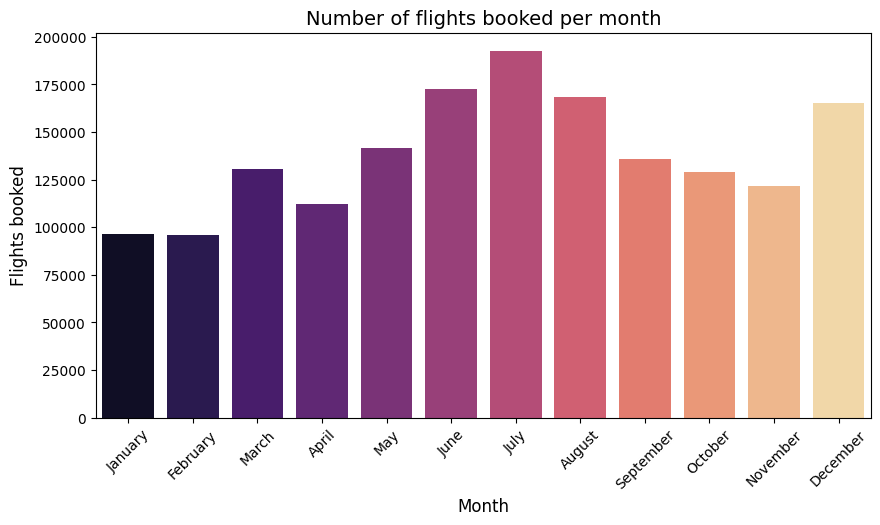

In [ ]:
# Creo un nuevo DataFrame para usar en esta gráfica
df_vuelos_mes_matplt = df_limpio.groupby("month")["flights_booked"].sum().reset_index()

# Orden de los meses
orden_meses = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 
               'August', 'September', 'October', 'November', 'December']

# Me aseguro de que los meses están ordenados como un tipo categórico con esta función
df_vuelos_mes_matplt['month'] = pd.Categorical(
    df_vuelos_mes_matplt['month'], 
    categories=orden_meses, 
    ordered=True
)

# Vuelvo a ordenar los datos con base en los meses categorizados
df_vuelos_mes_matplt = df_vuelos_mes_matplt.sort_values('month')

# Creo la figura y un único eje
fig, ax = plt.subplots(figsize=(10, 5))

# Creamos la gráfica con Seaborn
sns.barplot(
    x='month', 
    y='flights_booked', 
    hue='month',  # Asignar "month" a hue
    dodge=False,  # Evitar separación de barras
    data=df_vuelos_mes_matplt, 
    ax=ax, 
    palette='magma', 
    legend=False  # Ocultar la leyenda
)

# Ajustamos los ticks para mejorar la presentación
ax.tick_params(axis='x', rotation=45)

# Título opcional
ax.set_title('Number of flights booked per month', fontsize=14)

# Etiquetas de los ejes
ax.set_xlabel('Month', fontsize=12)
ax.set_ylabel('Flights booked', fontsize=12)

plt.show()


Según los resultados, el mayor número de vuelos se concentra en los meses de verano, siendo Julio el mes con más vuelos con casi 20.000, seguido por Junio, Agosto y Diciembre. Como se puede ver, los meses en donde hay periodos vacacionales, hay un incremento considerable de vuelos.

**2. ¿Existe una relación entre la distancia de los vuelos y los puntos acumulados por los cliente?**

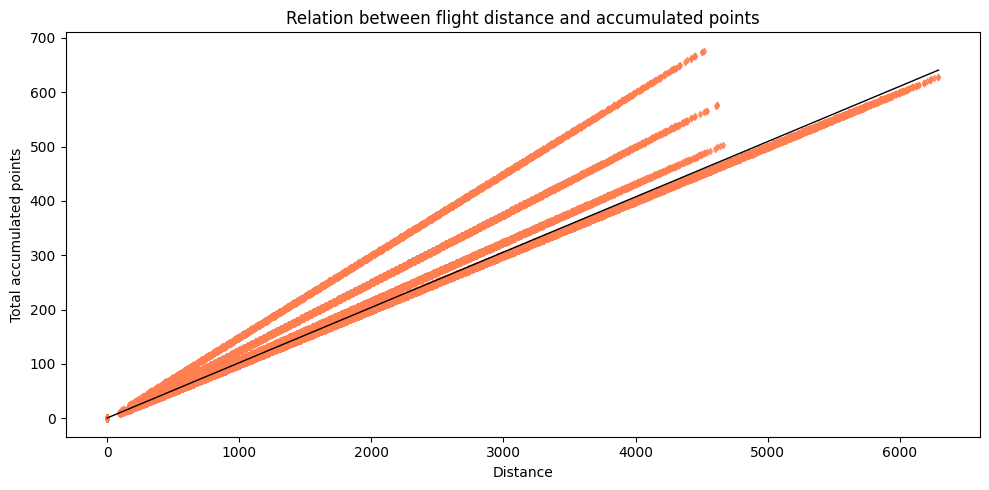

In [718]:
 #DISTANCE - points_accumulated

fig, axes = plt.subplots(nrows=1, ncols=1, sharex=False, sharey=False, figsize=(10, 5))

sns.regplot(
    x='distance', 
    y='points_accumulated', 
    data=df_limpio, 
    marker='d',
    line_kws={'color': 'black', 'linewidth': 1},
    scatter_kws={'color': 'coral', 's': 10},  # Cambié el tamaño de los puntos a 10 para mayor visibilidad
    ax=axes  # Aquí también puedes usar `ax=axes` ya que solo hay un subplot.
)

# Cambiamos los nombres de los ejes y ponemos título
axes.set_xlabel('Distance')
axes.set_ylabel('Total accumulated points')
axes.set_title('Relation between flight distance and accumulated points')

# Mostramos la gráfica
plt.tight_layout()
plt.show()


Efectivamente, según la gráfica de dispersión se puede ver que a mayor distancia se acumula un mayor número de puntos. Aún así, vamos a comprobar con valores atípicos: 

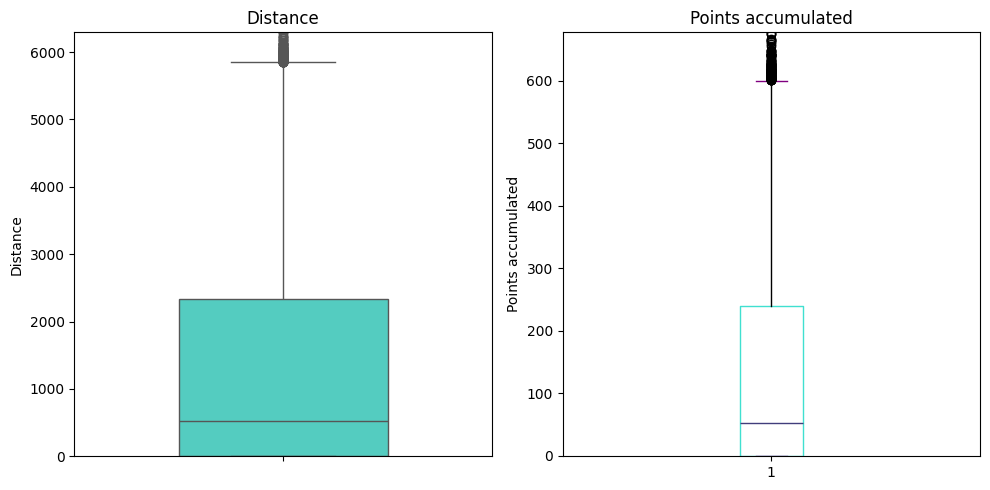

In [1005]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10, 5))  # Creamos dos subplots

# BOXPLOT USANDO SEABORN
sns.boxplot(
    y="distance", 
    data=df_limpio, 
    width=0.5, 
    color="turquoise", 
    ax=axes[0]  # Colocamos la gráfica en el subplot 0
)

axes[0].set_title("Distance")
axes[0].set_ylabel("Distance")
axes[0].set_xlabel("")  # No necesitamos etiqueta en el eje X

# Ajustamos el rango del eje Y (opcional, dependiendo de tus datos)
axes[0].set_ylim([df_limpio["distance"].min() - 1, df_limpio["distance"].max() + 1])

# BOXPLOT USANDO MATPLOTLIB
axes[1].boxplot(
    df_limpio["points_accumulated"],  # Usamos directamente la columna como entrada
    boxprops={"color": "turquoise"},  # Cambiamos el color de la línea
    capprops={"color": "purple"}  # Cambiamos el color de los bigotes
)

axes[1].set_title("Points accumulated")
axes[1].set_ylabel("Points accumulated")
axes[1].set_xlabel("")  # No necesitamos etiqueta en el eje X

# Ajustamos el rango del eje Y (opcional, dependiendo de tus datos)
axes[1].set_ylim([df_limpio["points_accumulated"].min() - 1, df_limpio["points_accumulated"].max() + 1])

# Mostramos la gráfica
plt.tight_layout()
plt.show()


Según los resultados en los boxplots, los valores atípicos en ambos pueden representar usuarios o vuelos fuera de lo común (distancias muy largas o puntos extremadamente altos).

**3. ¿Cuál es la distribución de los clientes por provincia o estado?**

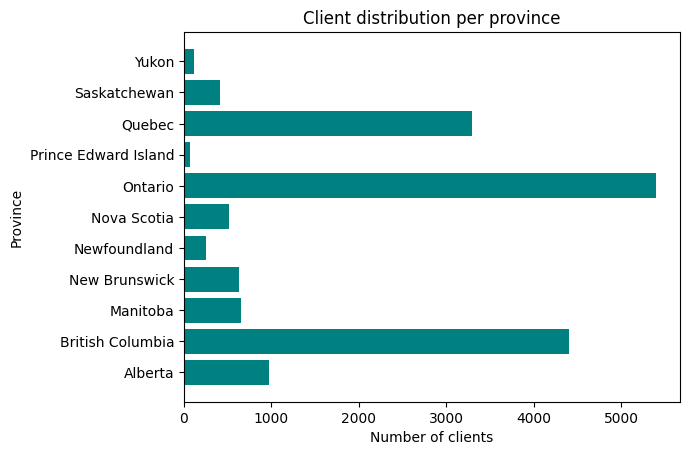

In [ ]:
# Agrupamos por 'province' y contamos los clientes únicos por 'loyalty_number' para evitar que cuente al mismo cliente.
df_clientes_por_estado = df_limpio.groupby("province")["loyalty_number"].nunique().reset_index(name="numero_clientes")

# Crear gráfico de barras horizontales
plt.barh(df_clientes_por_estado["province"], df_clientes_por_estado["numero_clientes"], color="teal")

# Etiquetas y título
plt.xlabel("Number of clients")
plt.ylabel("Province")
plt.title("Client distribution per province")

# Mostrar gráfico
plt.show()


Según el gráfico de barras, la provincia que tiene un mayor número de clientes es Ontario, con más de 120.000. Las provincias con mayor número de clientes son también las más grandes en superficie y población.

**4. ¿Cómo se compara el salario promedio entre los diferentes niveles educativos de los clientes?**

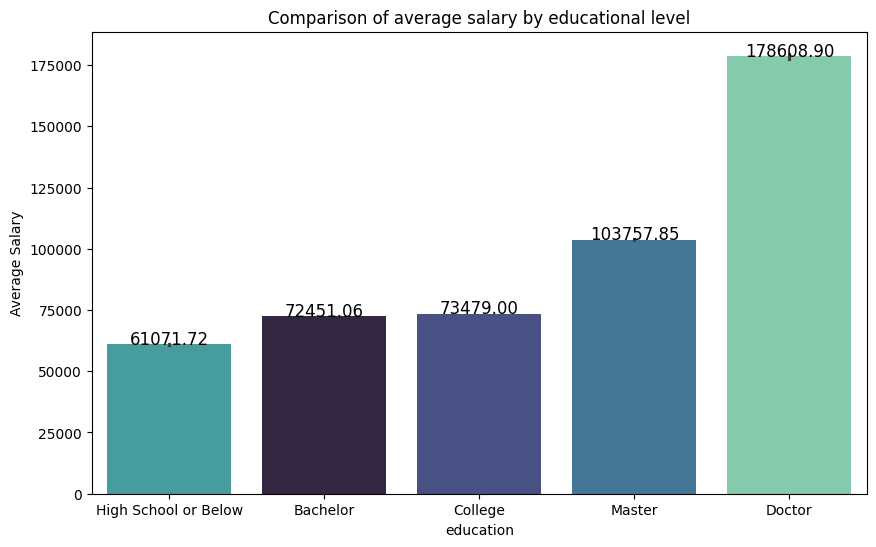

In [1006]:
# Creo un nuevo Dataframe para agrupar por 'education' y calcular el salario medio
df_salario_estudios = df_limpio.groupby("education")["salary"].mean().reset_index(name="salario_medio")

# Ordeno por salario medio ascendente
df_salario_estudios = df_salario_estudios.sort_values(by="salario_medio", ascending=True)

# Creo el gráfico de barras con 'hue' para los colores
fig, axes = plt.subplots(1, 1, figsize=(10, 6))

sns.barplot(x="education", 
            y="salary", 
            data=df_limpio, 
            ax=axes, 
            order=df_salario_estudios["education"],
            hue="education", 
            palette="mako", 
            legend=False)

# Añado los valores de salario medio en el gráfico
for i, level in enumerate(df_salario_estudios["education"]):
    # Colocar el valor de salario medio encima de la barra correspondiente
    axes.text(i, df_salario_estudios.loc[df_salario_estudios["education"] == level, "salario_medio"].values[0], 
              f'{df_salario_estudios.loc[df_salario_estudios["education"] == level, "salario_medio"].values[0]:.2f}', 
              horizontalalignment='center', size=12, color='black')

plt.title("Comparison of average salary by educational level")
plt.ylabel("Average Salary")
plt.show()



Como se puede observar a mayor nivel educativo, el salario promedio es mayor. También se puede ver que apenas hay diferencia entre el salario promedio de clientes con estudios de Bachillerato y Título universitario.

**5. ¿Cuál es la proporción de clientes con diferentes tipos de tarjetas de fidelidad?**

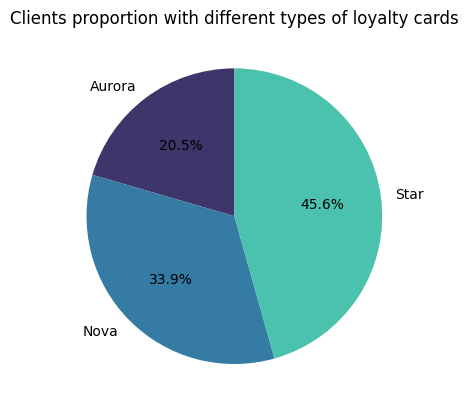

In [723]:
# Agrupamos en una variable nueva con 'loyalty_card' y contando los números únicos de 'loyalty_number'

df_fidelidad = df_limpio.groupby("loyalty_card")["loyalty_number"].nunique().reset_index(name="num_uniq_loyalty")

# Colores para el gráfico
colores = sns.color_palette("mako", len(df_fidelidad))

# Crear el gráfico de pie
plt.pie(df_fidelidad["num_uniq_loyalty"], 
        labels=df_fidelidad["loyalty_card"], 
        autopct='%1.1f%%', 
        colors=colores, 
        textprops={'fontsize': 10}, 
        startangle=90)

plt.title("Clients proportion with different types of loyalty cards")
plt.show()


Casi un 50% de los clientes son de la categoría de Star. Mientras que la categoría Nova va en segundo lugar y Aurora en último. 

**6. ¿Cómo se distribuyen los clientes según su estado civil y género?**

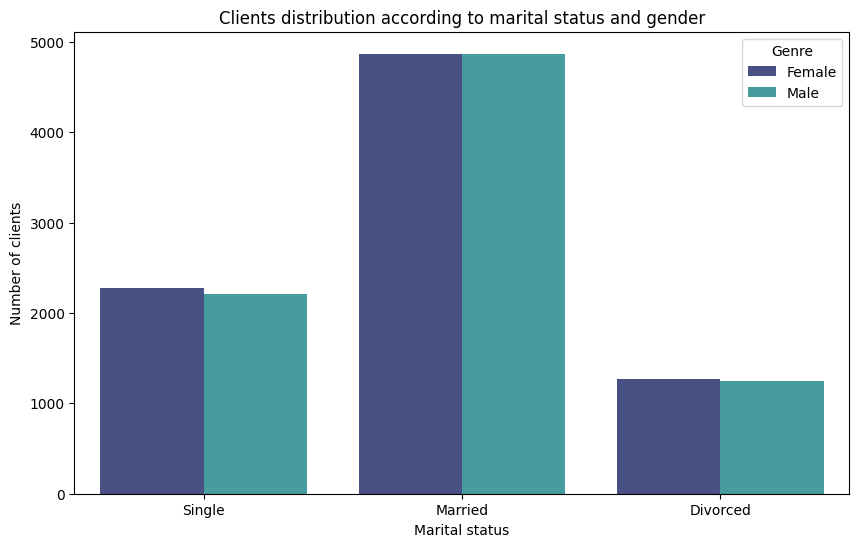

In [1007]:
# Agrupo las columnas 'gender' y 'marital_status' y contando los números únicos de 'loyalty_number' para hacer un recuento real sin clientes duplicados
df_distribution = df_limpio.groupby(['gender', 'marital_status'])['loyalty_number'].nunique().reset_index(name="num_uniq_loyalty")
df_distribution = df_distribution.sort_values(by="marital_status", ascending=False)

# Creamos un gráfico de barras apiladas
fig, axes = plt.subplots(1, 1, figsize=(10, 6))

# Introducimos los datos en el gráfico de barras apiladas
sns.barplot(x="marital_status", 
            y="num_uniq_loyalty", 
            hue="gender", 
            data=df_distribution, 
            ax=axes, 
            palette="mako")

# Añadimos título y etiquetas
plt.title("Clients distribution according to marital status and gender")
plt.xlabel("Marital status")
plt.ylabel("Number of clients")
plt.legend(title="Genre")

# Mostramos el gráfico
plt.show()


La distribución de clientes según el estado civil es mayor en casados, con la misma proporción de hombres y mujeres. En cambio, en las categorías los clientes solteros y divorciados hay un mayor número de mujeres que de hombres. 

***BONUS***

 **Fase 3: Evaluación de Diferencias en Reservas de Vuelos por Nivel Educativo**

 Utilizando un conjunto de datos que hemos compartido, se busca evaluar si existen diferencias significativas en el número de vuelos reservados según el nivel educativo de los clientes. Para ello, los pasos que deberas seguir son:



**1. Preparación de Datos: Filtra el conjunto de datos para incluir únicamente las columnas relevantes: 'Flights Booked' y 'Education'.**


In [1017]:
# Cargamos las bibliotecas necesarias para poder visualizar los análisis que queremos hacer:

# Evaluación linealidad de las relaciones entre las variables
# ------------------------------------------------------------------------------
from scipy.stats import shapiro, poisson, chisquare, expon, kstest
import scipy.stats as stats

# Configuración
# -----------------------------------------------------------------------
pd.set_option('display.max_columns', None) # para poder visualizar todas las columnas de los DataFrames

# Gestión de los warnings
# -----------------------------------------------------------------------
import warnings
warnings.filterwarnings("ignore")

In [1020]:
#Según mi interpretación, creo que habría que seleccionar las columnas del Dataframe que queremos analizar, por lo que he hecho esto: 

df_filtrado = df_limpio[['flights_booked', 'education']] 
df_filtrado.sample(5) #lo llamo para ver una pequeña muestra


,flights_booked,education
27782,3,Bachelor
147606,18,College
387614,0,Doctor
38054,5,College
278376,11,Bachelor


**2. Análisis Descriptivo: Agrupa los datos por nivel educativo y calcula estadísticas descriptivas básicas (como el promedio, la desviación estandar) del número de vuelos reservados para cada grupo.**


In [1016]:
#Aquí, siguiendo con lo que he interpretado, realizamos estadística descriptiva básica según el nivel educativo

estadisticas = df_filtrado.groupby('education')['flights_booked'].agg(['mean', 'std', 'var', 'count'])

estadisticas



,mean,std,var,count
education,,,,
Bachelor,4.112363,5.224957,27.300172,251400
College,4.172349,5.250673,27.569572,101712
Doctor,4.177736,5.262027,27.688930,17616
High School or Below,4.181319,5.248480,27.546543,18768
Master,4.208743,5.224245,27.292736,12192


**3. Prueba Estadística: Realiza una prueba de hipótesis para determinar si existe una diferencia significativa en el número de vuelos reservados entre los diferentes niveles educativos.**

In [1029]:
from scipy.stats import f_oneway

#La función realiza una prueba de hipótesis estadística para determinar si hay diferencias significativas entre las medias de uno o más grupos de datos.
def prueba_hipotesis(*args):
    
    # lo primero  miramos si las varianzas son iguales o no
    if len(args) == 2:
        p_valor_varianza = stats.levene(*args, center = "median")[1] #Se utiliza la prueba de Levene para verificar si las varianzas son iguales
    else:
        p_valor_varianza = stats.bartlett(*args)[1] #Se utiliza la prueba de Bartlett para verificar la homogeneidad de varianzas. 
    
    if p_valor_varianza > 0.05: # si el p-valor de la prueba de varianzas es mayor, asumimos que las varianzas son iguales
        # realizamos la prueba t de Student
        t_stat, p_valor = stats.ttest_ind(*args, equal_var=True)
    else:
        t_stat, p_valor = stats.ttest_ind(*args, equal_var=False)
        
    # Establecemos un nivel de significancia (alfa)
    alfa = 0.05

    # comparamos el p-valor con el nivel de significancia
    if p_valor < alfa:
        print("Rechazamos la hipótesis nula.")
        print("Hay una diferencia significativa en los vuelos promedio entre los dos niveles educativos.")
    else:
        print("No podemos rechazar la hipótesis nula.")
        print("No hay evidencia suficiente para afirmar una diferencia significativa en los vuelos promedio entre los dos niveles educativos.")



In [1030]:

# Prueba de Hipótesis sobre el número promedio de vuelos según nivel de estudios

bachelor = df_filtrado[df_filtrado['education'] == 'Bachelor']['flights_booked']
college = df_filtrado[df_filtrado['education'] == 'College']['flights_booked']
doctor = df_filtrado[df_filtrado['education'] == 'Doctor']['flights_booked']
high_school = df_filtrado[df_filtrado['education'] == 'High School or Below']['flights_booked']
master = df_filtrado[df_filtrado['education'] == 'Master']['flights_booked']


In [1031]:
# Llamamos a la función que hemos creado para hacer la comparativa según nivel de estudios
prueba_hipotesis(bachelor, college)

Rechazamos la hipótesis nula.
Hay una diferencia significativa en los vuelos promedio entre los dos niveles educativos.


In [ ]:
#Estas serían todas las combinaciones posibles según nivel de estudios

prueba_hipotesis(bachelor, college)
prueba_hipotesis(bachelor, doctor)
prueba_hipotesis(bachelor, high_school)
prueba_hipotesis(bachelor, master)
prueba_hipotesis(college, doctor)
prueba_hipotesis(college, high_school)
prueba_hipotesis(college, master),
prueba_hipotesis(doctor, high_school),
prueba_hipotesis(doctor, master),
prueba_hipotesis(high_school, master)